In [19]:
import numpy as np
import xarray as xr
import cartopy, cmocean, matplotlib, glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas 
import numpy as np

In [20]:
files=glob.glob("initial_data/*.nc")
files

['initial_data/export_data_luo.nc',
 'initial_data/primary_production_luo.nc',
 'initial_data/zooplankton_data_luo.nc']

In [21]:
ds=xr.open_mfdataset(files, combine="by_coords")

In [22]:
ds

<xarray.Dataset>
Dimensions:             (ST_OCEAN10_10: 1, ST_OCEAN35_35: 1, TIME: 12, XT_OCEAN: 360, YT_OCEAN: 200, bnds: 2)
Coordinates:
  * XT_OCEAN            (XT_OCEAN) float64 -279.5 -278.5 -277.5 ... 78.5 79.5
  * YT_OCEAN            (YT_OCEAN) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * ST_OCEAN10_10       (ST_OCEAN10_10) float64 95.0
  * TIME                (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
  * ST_OCEAN35_35       (ST_OCEAN35_35) float64 1.007e+03
Dimensions without coordinates: bnds
Data variables:
    YT_OCEAN_bnds       (YT_OCEAN, bnds) float64 dask.array<chunksize=(200, 2), meta=np.ndarray>
    ST_OCEAN10_10_bnds  (ST_OCEAN10_10, bnds) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    TIME_bnds           (TIME, bnds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    FCDET_100           (TIME, ST_OCEAN10_10, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 1, 200, 360), meta=np.ndarray>
    ST_OCEAN35_35_bnds  (ST_OCEAN35_35, bnds) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    FCDET_1000          (TIME, ST_OCEAN35_35, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 1, 200, 360), meta=np.ndarray>
    FCDET_BTM           (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    GEOLAT_T            (YT_OCEAN, XT_OCEAN) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    GEOLON_T            (YT_OCEAN, XT_OCEAN) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    SMALLZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    MEDZOO_BIOMASS      (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    LARGEZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    SMALLZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    MEDZOO_PROD         (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    LARGEZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    PRIMARY_PROD        (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
Attributes:
    history:      FERRET V6.85 (beta)  7-Apr-16
    Conventions:  CF-1.0

In [23]:
zoo_total_biomass=ds.SMALLZOO_BIOMASS+ds.MEDZOO_BIOMASS+ds.LARGEZOO_BIOMASS
##All zooplakton biomass

In [24]:
zoo_total_biomass

<xarray.DataArray (TIME: 12, YT_OCEAN: 200, XT_OCEAN: 360)>
dask.array<add, shape=(12, 200, 360), dtype=float64, chunksize=(12, 200, 360), chunktype=numpy.ndarray>
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * TIME      (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00

In [25]:
zoo_total_biomass.mean(dim=["XT_OCEAN","YT_OCEAN"])

<xarray.DataArray (TIME: 12)>
dask.array<mean_agg-aggregate, shape=(12,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * TIME     (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00

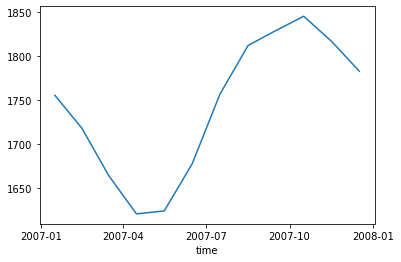

In [26]:
zoo_total_biomass.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()

In [27]:
log_npp = np.log10(zoo_total_biomass.mean(dim="TIME").values)

/Users/isarios/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


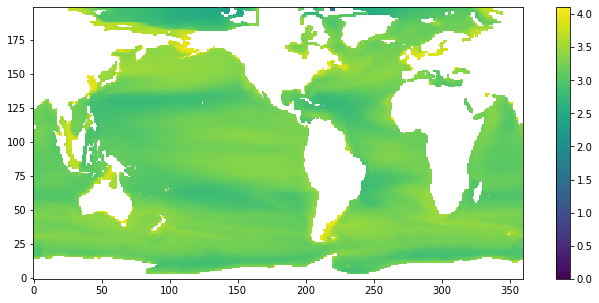

In [28]:
plt.figure(figsize=(12,5))
plt.imshow(log_npp, origin="bottom", vmin=0)
plt.colorbar()

/Users/isarios/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


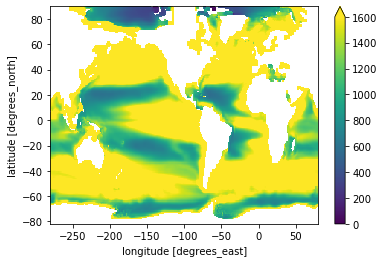

In [29]:
zoo_total_biomass.isel(TIME=slice(0,11)).mean(dim=["TIME"]).plot(vmin=0,vmax=1600)
##mean zooplakton biomass in a year 

In [82]:
##Plot all the reefs on top of the zooplkaton biomass 
def plot_breefs(lon, lat):
    fig = plt.figure(figsize=(21,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    bbox_props = dict(boxstyle="square", fc="white", ec="black", lw=2)
    zoo_total_biomass.isel(TIME=slice(0,11)).mean(dim=["TIME"]).plot(vmin=0,vmax=1600)
    ax.stock_img()
    ax.text(-40, -70, 'Zooplankton Biomass in Relation to Bleached Coral Reefs', transform=ccrs.Geodetic(), size=15,
            bbox=bbox_props)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-181,-180,-135,-90, -45, 0, 45,90,135, 180])
    gl.ylocator = mticker.FixedLocator([ -90,-45, 0, 45,90])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    plt.plot(lon, lat, 'ro',markersize=1)

    
    return fig


In [83]:
csv_fil = '/Users/isarios/Hollings_Docs/Hollings/Hollings_2020/CoralBleaching (2).csv'

In [84]:
df = pandas.read_csv(csv_fil,encoding= 'unicode_escape')

In [85]:
df

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,SEVERITY_CODE,BLEACHING_SEVERITY
0,2664.0,NaN,NaN,Mexico (Pacific),"Tijera and Mazunte, Oaxaca",16.0000,-95.000000,3.0,HIGH
1,278.0,NaN,NaN,United Kingdom,Blenheim Bank,-5.2500,72.470000,3.0,HIGH
2,2097.0,NaN,NaN,United Kingdom,Chagos,-6.1000,71.733333,3.0,HIGH
3,280.0,NaN,NaN,United Kingdom,Egmont,-6.6635,71.350400,3.0,HIGH
4,279.0,NaN,NaN,United Kingdom,Great Chagos Bank,-6.2348,71.998600,3.0,HIGH
...,...,...,...,...,...,...,...,...,...
4713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/isarios/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


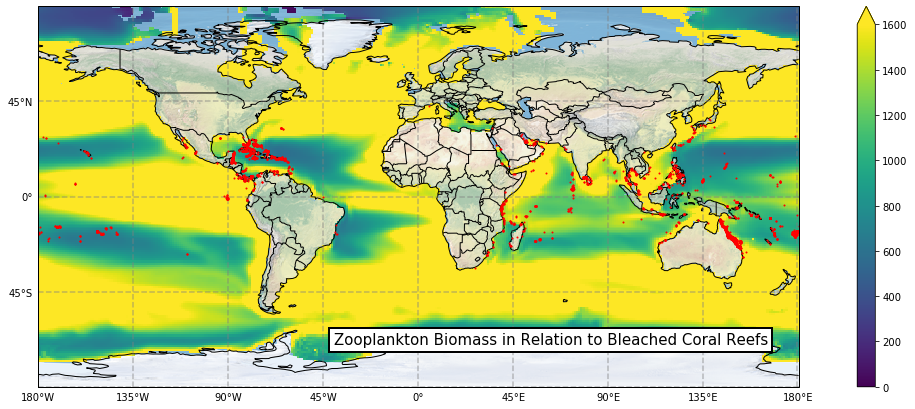

In [86]:
fig = plot_breefs(df['LON'],df['LAT'])
plt.show()

In [103]:
##Trying to zoom into the caribbean, was not succesful. 
def plot_reefs2(lon, lat):
    fig = plt.figure(figsize=(21,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    bbox_props = dict(boxstyle="square", fc="white", ec="black", lw=2)
    zoo_total_biomass.isel(YT_OCEAN=slice(100,201)).mean(dim=["TIME"]).plot(vmin=0)
    ax.text(-76,0, 'Caribbean Coral Reefs', transform=ccrs.Geodetic(), size=15,
            bbox=bbox_props)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-120,-110,-90,-60,-50])
    gl.ylocator = mticker.FixedLocator([-20,0,20,40,60,80])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    plt.plot(lon, lat, 'bo',markersize=2)
    
    return fig

In [104]:
df2=df.loc[(df['LON']>=-120)&(df['LON']<=-60)&(df['LAT']>=-10)]

In [105]:
df2

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,SEVERITY_CODE,BLEACHING_SEVERITY
0,2664.0,NaN,NaN,Mexico (Pacific),"Tijera and Mazunte, Oaxaca",16.000000,-95.000000,3.0,HIGH
7,226.0,NaN,NaN,United Kingdom,"Soufriere, Saint Lucia",13.871600,-61.080800,3.0,HIGH
67,219.0,Americas,Eastern Caribbean,Guadeloupe,Guadaloupe,16.372700,-61.651600,3.0,HIGH
68,756.0,Americas,Eastern Caribbean,Guadeloupe,Guadaloupe,16.372700,-61.651600,3.0,HIGH
69,2209.0,Americas,Eastern Caribbean,Guadeloupe,Guadeloupe,16.250000,-61.833333,3.0,HIGH
...,...,...,...,...,...,...,...,...,...
3927,2227.0,Americas,U.S. Caribbean,Virgin Islands (U.S.),St. Croix,17.733333,-64.733333,-1.0,Severity Unknown
3928,2228.0,Americas,U.S. Caribbean,Virgin Islands (U.S.),St. Croix,17.733333,-64.733333,-1.0,Severity Unknown
3929,2271.0,Americas,U.S. Caribbean,Virgin Islands (U.S.),St. Thomas,18.333333,-64.933333,-1.0,Severity Unknown
3930,2225.0,Americas,U.S. Caribbean,Virgin Islands (U.S.),US Virgin Islands,17.705000,-64.693000,-1.0,Severity Unknown


/Users/isarios/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


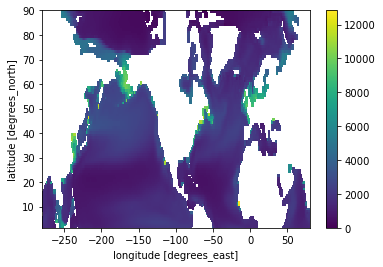

In [106]:
lat_c_zoo=zoo_total_biomass.isel(YT_OCEAN=slice(100,201)).mean(dim=["TIME"]).plot(vmin=0)

In [107]:
lat_c_zoo.isel(XT_OCEAN=slice(-150,0)).mean(dim=["TIME"]).plot(vmin=0)

AttributeError: 'QuadMesh' object has no attribute 'isel'

/Users/isarios/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


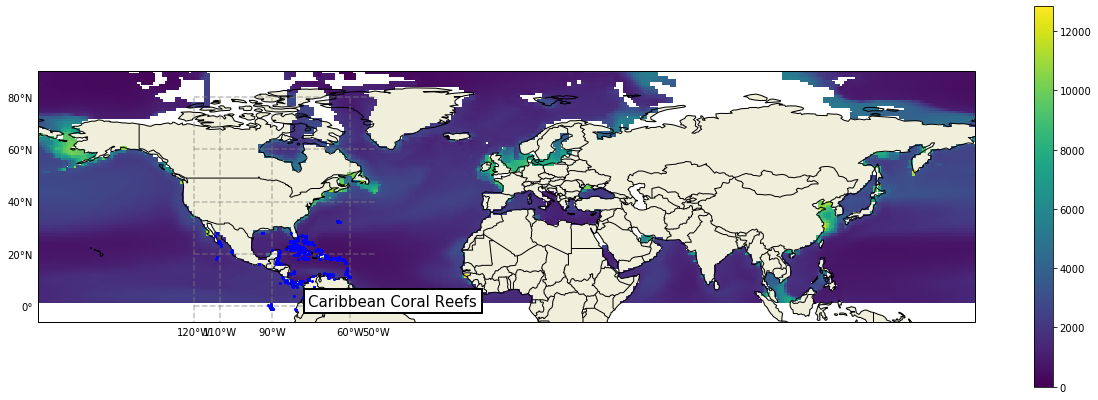

In [108]:
fig = plot_reefs2(df2['LON'],df2['LAT'])
plt.show()